<a href="https://colab.research.google.com/github/cjhaster/NRSurrogateCatalog/blob/gh-pages/_sources/events/GW190413_052954.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
import pip

try:
    __import__("nrsur_catalog")
except ImportError:
    pip.main(
        [
            "install",
            "nrsur_catalog @ git+https://github.com/cjhaster/NRSurrogateCatalog@main#egg",
            "-q",
        ]
    )


# GW190413_052954

Below are some plots for GW190413_052954 from the NRSurrogate Catalog.

In [3]:
from nrsur_catalog import NRsurResult

nrsur_result = NRsurResult.load("GW190413_052954", cache_dir=".nrsur_catalog_cache")
# you can specify a `cache_dir`: folder where data will be downloaded

## Summary

In [4]:
nrsur_result.summary()

,Posterior 90% CI,Prior
Parameter,,
$m_1\ [M_{\odot}]$,${52.32}_{-6.43}^{+8.13}$,$-$
$m_2\ [M_{\odot}]$,${38.43}_{-6.64}^{+5.82}$,$-$
$\mathcal{M}\ [M_{\odot}]$,${38.64}_{-3.54}^{+3.76}$,"$\text{UniformInComponentsChirpMass} [12, 400]$"
$q$,${0.75}_{-0.19}^{+0.17}$,"$\text{UniformInComponentsMassRatio} [0.17, 1]$"
$a_1$,${0.38}_{-0.27}^{+0.35}$,"$\text{Uniform} [0, 0.99]$"
$a_2$,${0.46}_{-0.31}^{+0.34}$,"$\text{Uniform} [0, 0.99]$"
$\theta_1$,${1.63}_{-0.70}^{+0.67}$,"$\text{Sine} [0, 3.14]$"
$\theta_2$,${1.71}_{-0.74}^{+0.67}$,"$\text{Sine} [0, 3.14]$"
$\chi_{\mathrm{eff}}$,${-0.03}_{-0.18}^{+0.15}$,$-$




| Parameter                    | Posterior 90% CI                  | Prior                                           |
|:-----------------------------|:----------------------------------|:------------------------------------------------|
| $m_1\ [M_{\odot}]$           | ${52.32}_{-6.43}^{+8.13}$         | $-$                                             |
| $m_2\ [M_{\odot}]$           | ${38.43}_{-6.64}^{+5.82}$         | $-$                                             |
| $\mathcal{M}\ [M_{\odot}]$   | ${38.64}_{-3.54}^{+3.76}$         | $\text{UniformInComponentsChirpMass} [12, 400]$ |
| $q$                          | ${0.75}_{-0.19}^{+0.17}$          | $\text{UniformInComponentsMassRatio} [0.17, 1]$ |
| $a_1$                        | ${0.38}_{-0.27}^{+0.35}$          | $\text{Uniform} [0, 0.99]$                      |
| $a_2$                        | ${0.46}_{-0.31}^{+0.34}$          | $\text{Uniform} [0, 0.99]$                      |
| $\theta_1$                   | ${1.63}_{-0.70}^{+0.67}$          | $\text{Sine} [0, 3.14]$                         |
| $\theta_2$                   | ${1.71}_{-0.74}^{+0.67}$          | $\text{Sine} [0, 3.14]$                         |
| $\chi_{\mathrm{eff}}$        | ${-0.03}_{-0.18}^{+0.15}$         | $-$                                             |
| $\chi_{\mathrm{p}}$          | ${0.41}_{-0.21}^{+0.26}$          | $-$                                             |
| $\alpha$                     | ${1.17}_{-0.06}^{+2.03}$          | $-$                                             |
| $\delta$                     | ${-0.74}_{-0.06}^{+2.05}$         | $-$                                             |
| $t_c\ [s]$                   | ${1239168612.48}_{-0.00}^{+0.03}$ | $\text{Uniform} [1239168612.4, 1239168612.6]$   |
| $d_L\ [Mpc]$                 | ${3399.79}_{-923.95}^{+1079.26}$  | $\text{UniformSourceFrame} [100.0, 10000.0]$    |
| $\phi$                       | ${3.11}_{-2.13}^{+2.14}$          | $\text{Uniform} [0, 6.28]$                      |
| $\phi$                       | ${2.81}_{-0.05}^{+2.90}$          | $\text{Uniform} [0, 6.28]$                      |
| $\theta$                     | ${1.24}_{-0.05}^{+0.04}$          | $\text{Sine} [0, 3.14]$                         |
| $\psi$                       | ${1.55}_{-0.94}^{+0.99}$          | $\text{Uniform} [0, 3.14]$                      |
| $\phi_{\mathrm{JL}}$         | ${3.19}_{-2.13}^{+2.06}$          | $\text{Uniform} [0, 6.28]$                      |
| $\phi_{12}$                  | ${3.04}_{-2.04}^{+2.20}$          | $\text{Uniform} [0, 6.28]$                      |
| $\theta_{\mathrm{JN}}$       | ${0.78}_{-0.41}^{+1.69}$          | $\text{Sine} [0, 3.14]$                         |
| $m_f\ [M_{\odot}]$           | ${86.82}_{-7.34}^{+7.81}$         | $-$                                             |
| $\chi_f$                     | ${0.67}_{-0.06}^{+0.06}$          | $-$                                             |
| $v_{\rm kick}\ [{\rm km/s}]$ | ${453.87}_{-279.14}^{+584.85}$    | $-$                                             |


Lets make some plots!

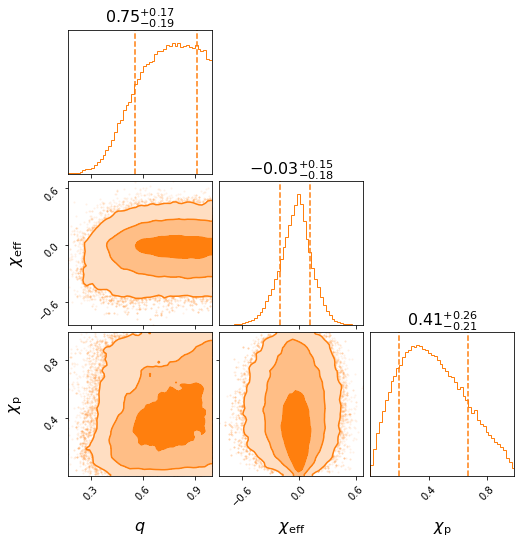

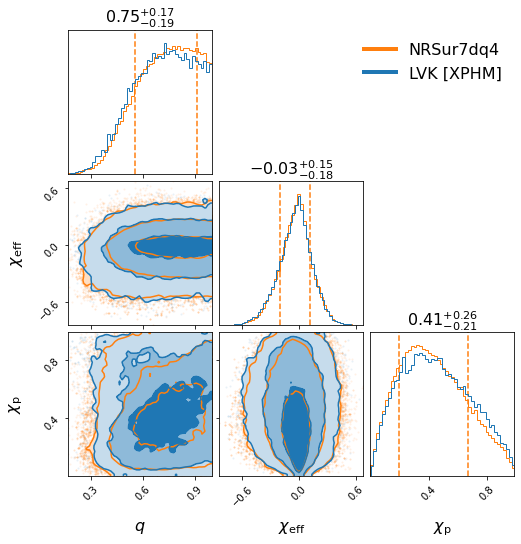

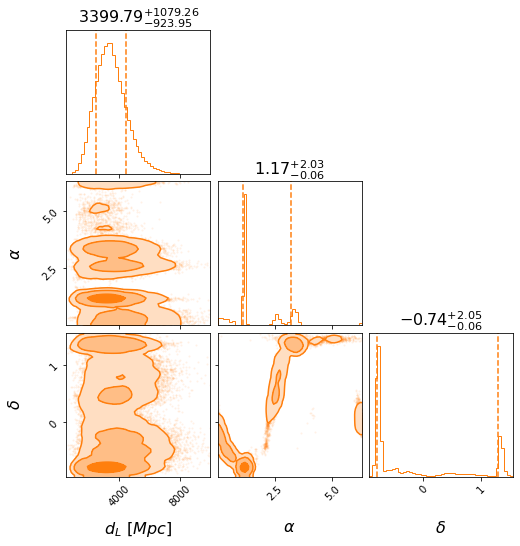

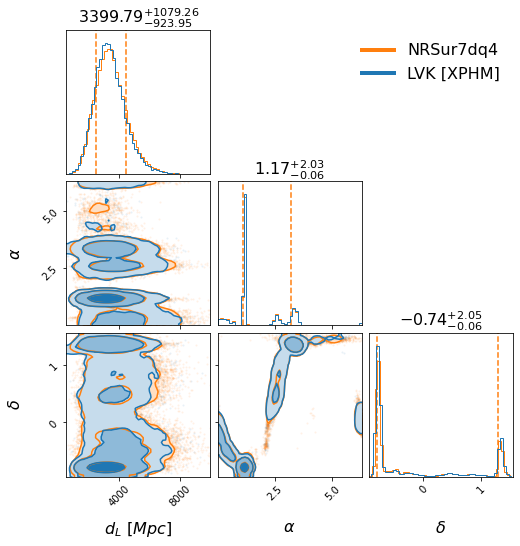

In [5]:
# NRSurrogate corner plots

import os

param_sets = dict(
    mass=["mass_1", "mass_2", "chirp_mass", "mass_ratio"],
    spin=["a_1", "a_2", "tilt_1", "tilt_2"],
    effective_spin=["mass_ratio", "chi_eff", "chi_p"],
    sky_localisation=["luminosity_distance", "ra", "dec"],
    remnant=["final_mass", "final_spin", "final_kick"],
)
for name, params in param_sets.items():
    fname = f"GW190413_052954_{name}_corner.png"
    if not os.path.isfile(fname):
        fig = nrsur_result.plot_corner(params)
        fig.savefig(fname)

    if name == "remnant":
        continue

    # LVK-Comparison plots
    fname = f"GW190413_052954_compare_{name}_corner.png"
    if not os.path.isfile(fname):
        fig = nrsur_result.plot_lvk_comparison_corner(params)
        fig.savefig(fname)


## Corner Plots

### Mass


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190413_052954_mass_corner.png"](GW190413_052954_mass_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190413_052954_compare_mass_corner.png"](GW190413_052954_compare_mass_corner.png)
:::

::::



### Spin


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190413_052954_spin_corner.png"](GW190413_052954_spin_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190413_052954_compare_spin_corner.png"](GW190413_052954_compare_spin_corner.png)
:::

::::


### Effective Spin


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190413_052954_effective_spin_corner.png"](GW190413_052954_effective_spin_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190413_052954_compare_effective_spin_corner.png"](GW190413_052954_compare_effective_spin_corner.png)
:::

::::



### Sky-localisation


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190413_052954_sky_localisation_corner.png"](GW190413_052954_sky_localisation_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190413_052954_compare_sky_localisation_corner.png"](GW190413_052954_compare_sky_localisation_corner.png)
:::

::::



### Remnant

!["GW190413_052954_remnant_corner.png"](GW190413_052954_remnant_corner.png)


## Waveform posterior-predictive plot

In [6]:
fname = f"GW190413_052954_waveform.png"
if not os.path.isfile(fname):
    fig = nrsur_result.plot_signal(outdir=".")


![waveform](GW190413_052954_waveform.png)

## Animations  
Here are some animations of the posterior.

|Spin       | 
|-----------|
| <iframe width="560" height="315" src="https://www.youtube.com/embed/msRN00Spjbs?loop=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>    |   

|Remnant       | 
|-----------|
| <iframe width="560" height="315" src="https://www.youtube.com/embed/mkxggi9SM8M?loop=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>    | 


## Analysis configs
Below are the configs used for the analysis of this job.

In [7]:
nrsur_result.print_configs()

Tmax:                               10000
accounting:                         None
accounting_user:                    None
adapt:                              False
allow_tape:                         True
analysis_executable:                None
analysis_executable_parser:         None
autocorr_c:                         5.0
autocorr_tol:                       50.0
bilby_zero_likelihood_mode:         False
burn_in_nact:                       50.0
calibration_model:                  CubicSpline
calibration_prior_boundary:         reflective
catch_waveform_errors:              True
channel_dict:                       {H1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01, L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01, V1:Hrec_hoft_16384Hz}
check_point_deltaT:                 3600
clean:                              False
coherence_test:                     False
conda_env:                          None
condor_job_priority:                0
conversion_function:                None
create_summary:              

If you used this data, please [cite this work](../citation.md).